In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import matplotlib.patches as mpatches

%matplotlib notebook

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

df.head()

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [3]:
yearly_mean = df.mean(axis=1)
error_margin = (df.std(axis=1) / 
                (np.sqrt(len(df.columns)))
               ) * 1.96

<IPython.core.display.Javascript object>


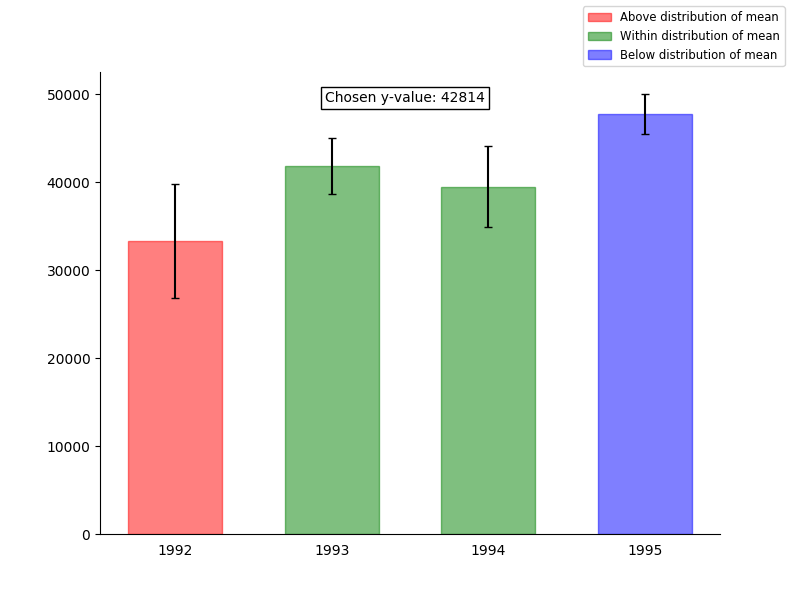

In [4]:
fig, ax = plt.subplots(figsize = (8,6))
bar_chart = ax.bar(df.index, yearly_mean, yerr=error_margin,
                   capsize=3, width=0.6, alpha = 0.5)

ax.set_xticks(df.index.values)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis = "x", which = "both", bottom=False)

red_patch = mpatches.Patch(color="red", alpha = 0.5, label = "Above distribution of mean")
green_patch = mpatches.Patch(color="green", alpha = 0.5, label = "Within distribution of mean")
purple_patch = mpatches.Patch(color="blue", alpha = 0.5, label = "Below distribution of mean")

ax.legend(handles=[red_patch, green_patch, purple_patch],
         bbox_to_anchor = (0.77, 1) , fontsize="small")

# Interactivity

In [5]:
cursor = Cursor(ax, horizOn=True, vertOn=False, useblit=True,
               color = "r", linewidth = 1)

In [6]:
annot = ax.annotate("", xy=(0,0), xytext = (-40, 40), textcoords="offset points",
                   bbox={"boxstyle":"square", "fc":"white", "ec":"k",
                        "lw":1}
                   )

annot.set_visible(False)

In [7]:
def onclick(event):
    
    chosen_y_value = event.ydata
    x =  event.xdata
    
    annot.xy = (x, chosen_y_value)
    text = "Chosen y-value: {:.0f}".format((chosen_y_value))
    annot.set_text(text)
    annot.set_visible(True)
    
    bar_coloring = []
    
    for y, e in zip(yearly_mean, error_margin):
        if chosen_y_value > (y + e):
            bar_coloring.append("red")
        
        elif chosen_y_value < (y - e):
            bar_coloring.append("blue")
        
        else: bar_coloring.append("green")
    
    for bar, coloring in zip(bar_chart, bar_coloring):
        bar.set_color(coloring)
    
    

fig.canvas.mpl_connect("button_press_event", onclick)


9